In [1]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Prétraitement
from sklearn.preprocessing import StandardScaler

# Split
from sklearn.model_selection import train_test_split

# Modélisation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Évaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve
)

# Optimisation
from sklearn.model_selection import GridSearchCV, cross_val_score

# PCA
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# 1. Nettoyage & compréhention

In [3]:
# Chargement des données
df_abandon = pd.read_csv("Dataset_Abandon_Scolaire.csv")

In [4]:
# Aperçu rapide
print(df_abandon.head())
print("\nDimensions :", df_abandon.shape)
print("\nColonnes :", df_abandon.columns.tolist())
print("\nTypes de données :\n", df_abandon.dtypes)
print("\nStatistiques descriptives :\n", df_abandon.describe(include='all'))
print("\nValeurs manquantes :\n", df_abandon.isnull().sum())

   Age   Sexe  Taux_presence  Nombre_retards  Note_moyenne  \
0   21  Femme      89.585023               2     15.826896   
1   20  Homme      70.713068               3     12.829358   
2   22  Femme      82.122963               1     13.086319   
3   24  Homme      87.408859               3     14.992032   
4   20  Homme      86.470676               3     12.671649   

  Situation_familiale  Abandon  
0    Enfants à charge        0  
1         Célibataire        0  
2    Enfants à charge        0  
3         Célibataire        0  
4               Marié        0  

Dimensions : (2000, 7)

Colonnes : ['Age', 'Sexe', 'Taux_presence', 'Nombre_retards', 'Note_moyenne', 'Situation_familiale', 'Abandon']

Types de données :
 Age                      int64
Sexe                    object
Taux_presence          float64
Nombre_retards           int64
Note_moyenne           float64
Situation_familiale     object
Abandon                  int64
dtype: object

Statistiques descriptives :
           

Répartition

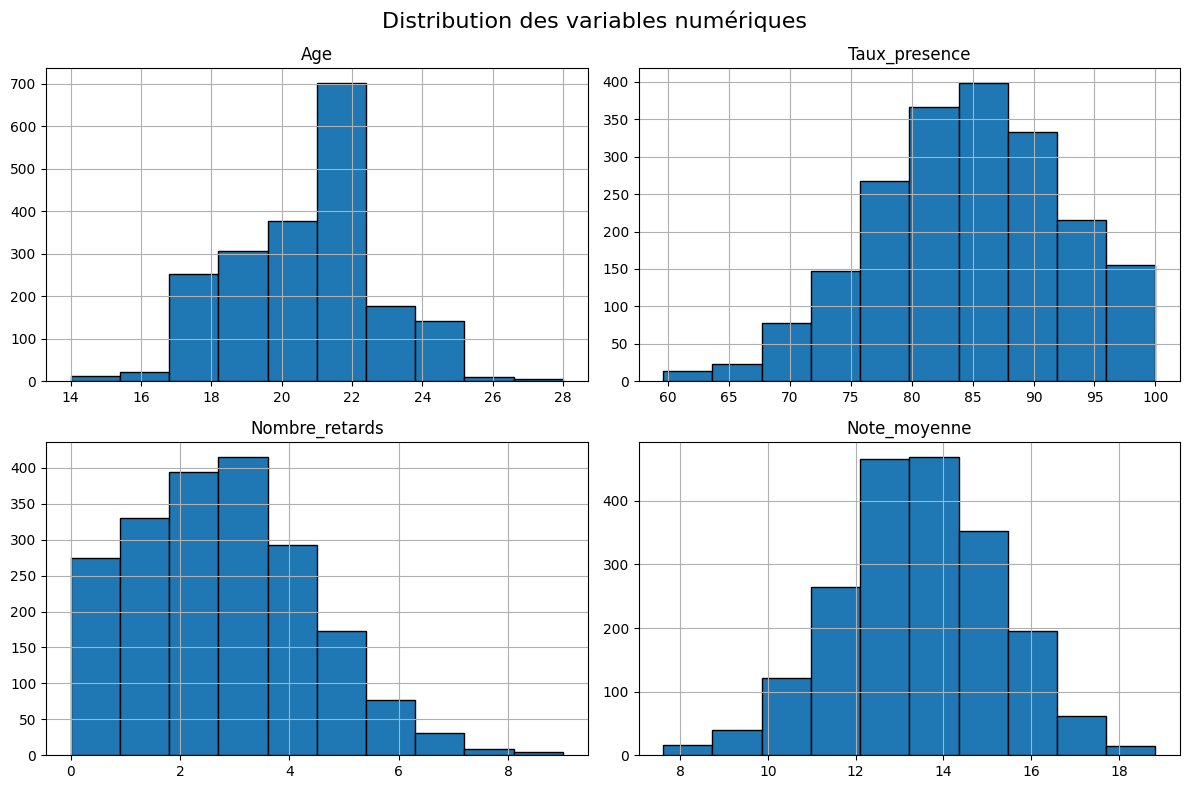

In [5]:
# Histogrammes des variables numériques
df_abandon[['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']].hist(
    bins=10, figsize=(12, 8), edgecolor='black'
)
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.tight_layout()
plt.show()

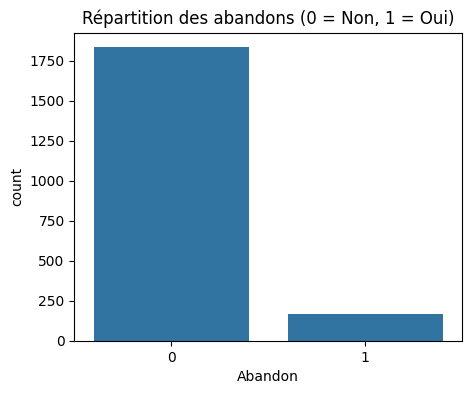

In [6]:
# Répartition de la cible (Abandon)
plt.figure(figsize=(5,4))
sns.countplot(x="Abandon", data=df_abandon)
plt.title("Répartition des abandons (0 = Non, 1 = Oui)")
plt.show()

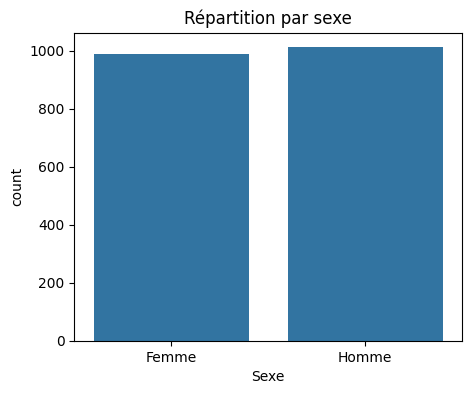

In [7]:
# Répartition par sexe
plt.figure(figsize=(5,4))
sns.countplot(x="Sexe", data=df_abandon)
plt.title("Répartition par sexe")
plt.show()

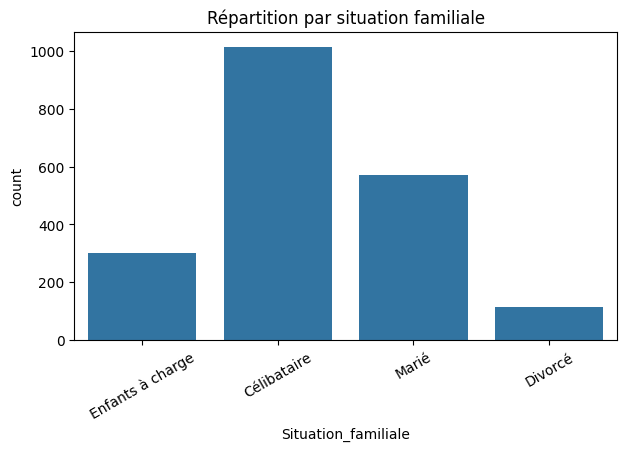

In [8]:
# Répartition par situation familiale
plt.figure(figsize=(7,4))
sns.countplot(x="Situation_familiale", data=df_abandon)
plt.title("Répartition par situation familiale")
plt.xticks(rotation=30)
plt.show()

Graphiques pour les corrélations

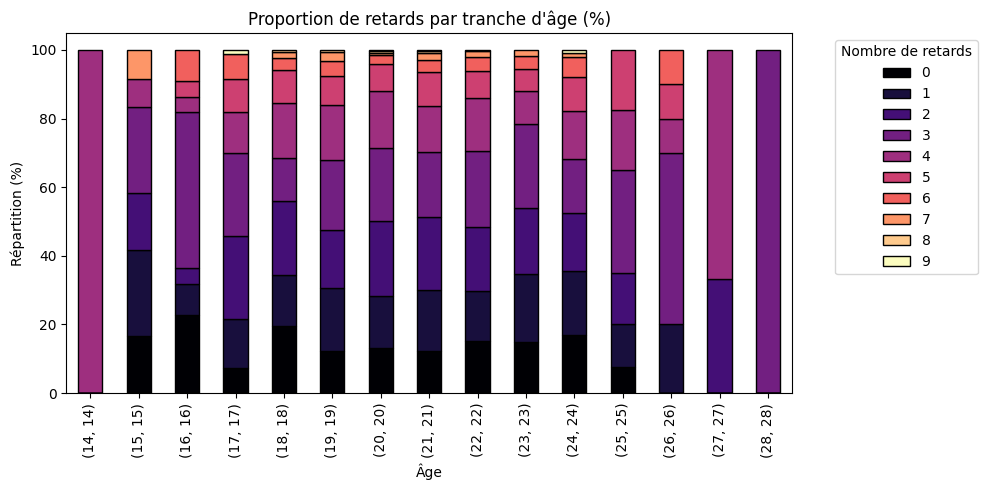

In [82]:
# Concevoir une table croisée avec pourcentages par âge
age_retard_pct = (
    df_abandon.groupby(["Age", "Nombre_retards"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .fillna(0)
)

# Tracé
age_retard_pct.plot(
    kind='bar',
    stacked=True,
    colormap='magma',
    figsize=(10, 5),
    edgecolor='black'
)
plt.title("Proportion de retards par tranche d'âge (%)")
plt.xlabel("Âge")
plt.ylabel("Répartition (%)")
plt.legend(title="Nombre de retards", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

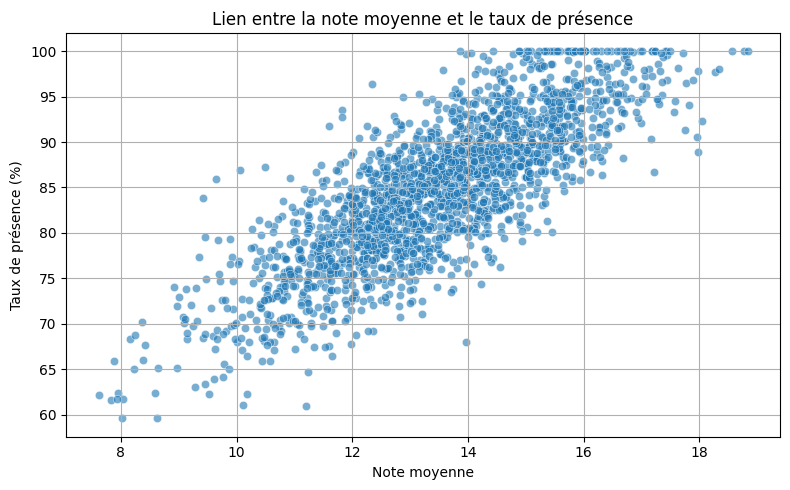

In [83]:
# Lien entre Note moyenne et Taux de présence (nuage de points)``
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_abandon,
    x="Note_moyenne",
    y="Taux_presence",
    alpha=0.6
)
plt.title("Lien entre la note moyenne et le taux de présence")
plt.xlabel("Note moyenne")
plt.ylabel("Taux de présence (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-84-152c633fa9dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


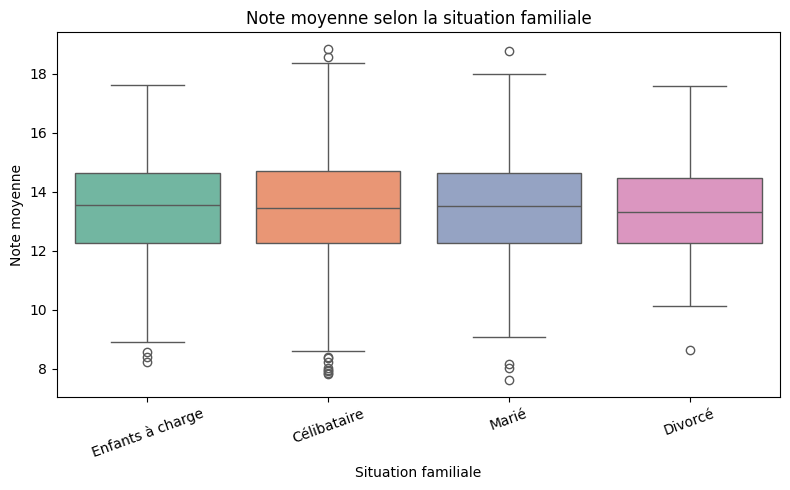

In [84]:
# Note moyenne selon la situation familiale (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_abandon,
    x="Situation_familiale",
    y="Note_moyenne",
    palette="Set2"
)
plt.title("Note moyenne selon la situation familiale")
plt.xlabel("Situation familiale")
plt.ylabel("Note moyenne")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Corrélation avec l'abandon

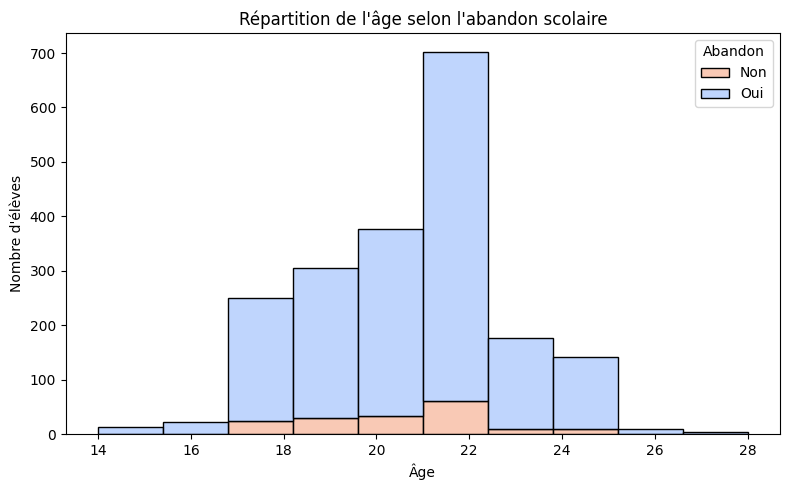

In [86]:
# Distribution de l'âge par abandon
plt.figure(figsize=(8, 5))
sns.histplot(data=df_abandon, x="Age", hue="Abandon", multiple="stack", bins=10, palette="coolwarm")
plt.title("Répartition de l'âge selon l'abandon scolaire")
plt.xlabel("Âge")
plt.ylabel("Nombre d'élèves")
plt.legend(title="Abandon", labels=["Non", "Oui"])
plt.tight_layout()
plt.show()

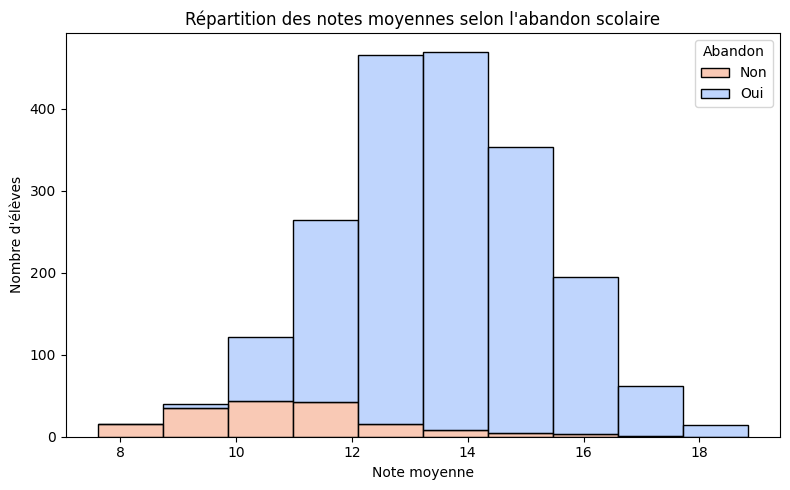

In [87]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_abandon, x="Note_moyenne", hue="Abandon", multiple="stack", bins=10, palette="coolwarm")
plt.title("Répartition des notes moyennes selon l'abandon scolaire")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre d'élèves")
plt.legend(title="Abandon", labels=["Non", "Oui"])
plt.tight_layout()
plt.show()


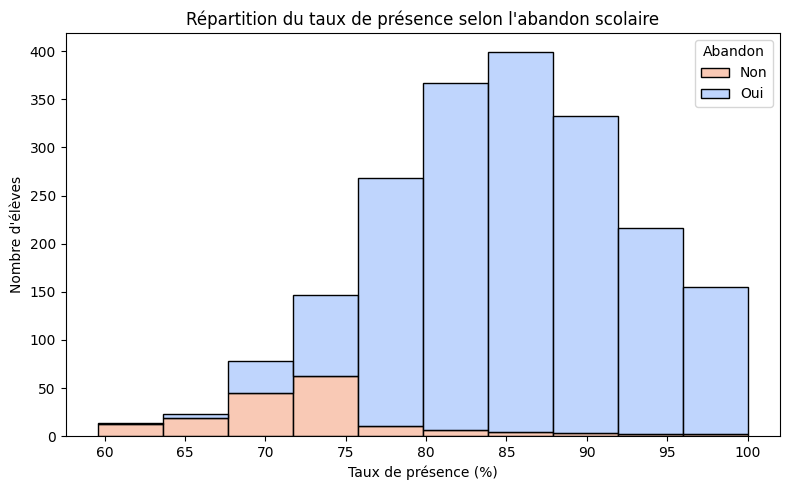

In [88]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_abandon, x="Taux_presence", hue="Abandon", multiple="stack", bins=10, palette="coolwarm")
plt.title("Répartition du taux de présence selon l'abandon scolaire")
plt.xlabel("Taux de présence (%)")
plt.ylabel("Nombre d'élèves")
plt.legend(title="Abandon", labels=["Non", "Oui"])
plt.tight_layout()
plt.show()


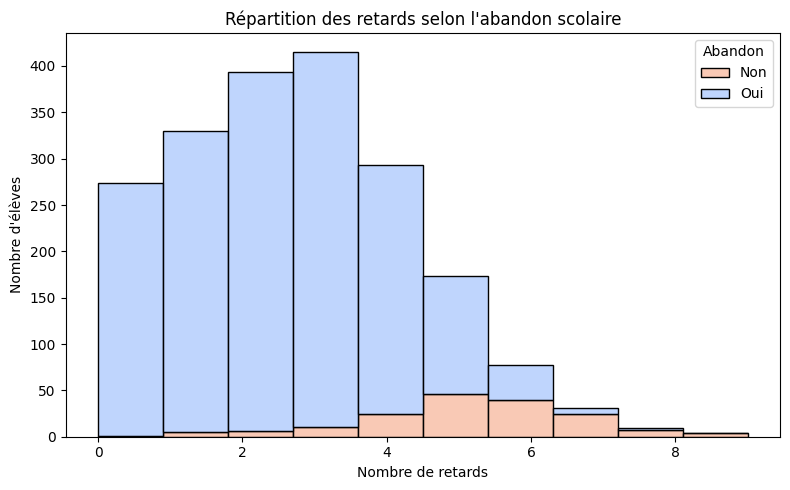

In [89]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_abandon, x="Nombre_retards", hue="Abandon", multiple="stack", bins=10, palette="coolwarm")
plt.title("Répartition des retards selon l'abandon scolaire")
plt.xlabel("Nombre de retards")
plt.ylabel("Nombre d'élèves")
plt.legend(title="Abandon", labels=["Non", "Oui"])
plt.tight_layout()
plt.show()


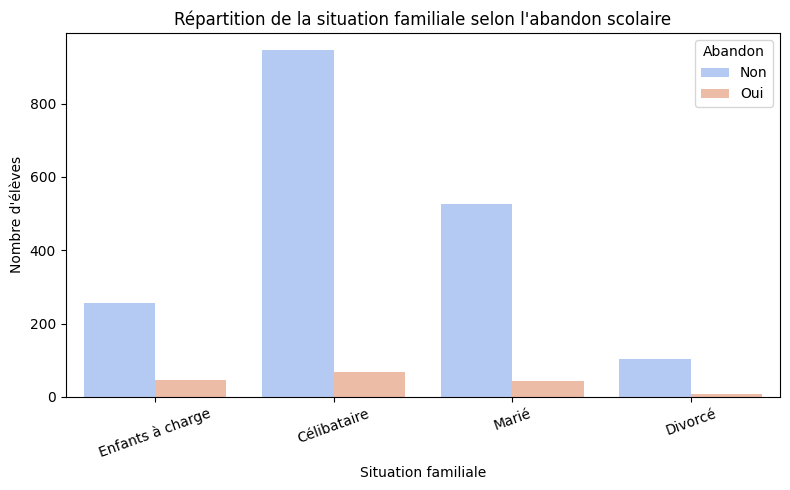

In [90]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_abandon,
    x="Situation_familiale",
    hue="Abandon",
    palette="coolwarm"
)
plt.title("Répartition de la situation familiale selon l'abandon scolaire")
plt.xlabel("Situation familiale")
plt.ylabel("Nombre d'élèves")
plt.legend(title="Abandon", labels=["Non", "Oui"])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


# 2. Nettoyage

In [10]:
df_clean = df_abandon.copy()

In [11]:
# Nettoyage des valeurs avant mapping
df_clean["Sexe"] = df_abandon["Sexe"].str.strip().str.capitalize()  # supprime les espaces + met 1re lettre en maj
df_clean["Sexe"] = df_clean["Sexe"].map({"Femme": 0, "Homme": 1})

In [12]:
df_clean.dtypes

,0
Age,int64
Sexe,int64
Taux_presence,float64
Nombre_retards,int64
Note_moyenne,float64
Situation_familiale,object
Abandon,int64


In [13]:
# Encodage One-Hot complet sans drop
df_clean = pd.get_dummies(df_clean, columns=["Situation_familiale"], drop_first=False)

In [14]:
# Aperçu après One-Hot Encoding
print("Aperçu du DataFrame après One-Hot Encoding :")
print(df_clean.head())

Aperçu du DataFrame après One-Hot Encoding :
   Age  Sexe  Taux_presence  Nombre_retards  Note_moyenne  Abandon  \
0   21     0      89.585023               2     15.826896        0   
1   20     1      70.713068               3     12.829358        0   
2   22     0      82.122963               1     13.086319        0   
3   24     1      87.408859               3     14.992032        0   
4   20     1      86.470676               3     12.671649        0   

   Situation_familiale_Célibataire  Situation_familiale_Divorcé  \
0                            False                        False   
1                             True                        False   
2                            False                        False   
3                             True                        False   
4                            False                        False   

   Situation_familiale_Enfants à charge  Situation_familiale_Marié  
0                                  True                      F

In [15]:
print("\nColonnes conçu pour Situation_familiale :")
print([col for col in df_clean.columns if col.startswith("Situation_familiale_")])


Colonnes conçu pour Situation_familiale :
['Situation_familiale_Célibataire', 'Situation_familiale_Divorcé', 'Situation_familiale_Enfants à charge', 'Situation_familiale_Marié']


In [16]:
# Liste de toutes les colonnes sauf la cible
features_to_scale = [col for col in df_clean.columns if col != "Abandon"]

# Initialisation du scaler
scaler = StandardScaler()

# Application du scaler
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

In [17]:
df_clean.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Abandon,Situation_familiale_Célibataire,Situation_familiale_Divorcé,Situation_familiale_Enfants à charge,Situation_familiale_Marié
0,0.202206,-1.011061,0.624749,-0.331971,1.319016,0,-1.014099,-0.244711,2.371185,-0.632124
1,-0.294615,0.989060,-1.758076,0.227373,-0.338153,0,0.986097,-0.244711,-0.421730,-0.632124
2,0.699027,-1.011061,-0.317431,-0.891315,-0.196094,0,-1.014099,-0.244711,2.371185,-0.632124
3,1.692670,0.989060,0.349980,0.227373,0.857467,0,0.986097,-0.244711,-0.421730,-0.632124
4,-0.294615,0.989060,0.231523,0.227373,-0.425342,0,-1.014099,-0.244711,-0.421730,1.581969


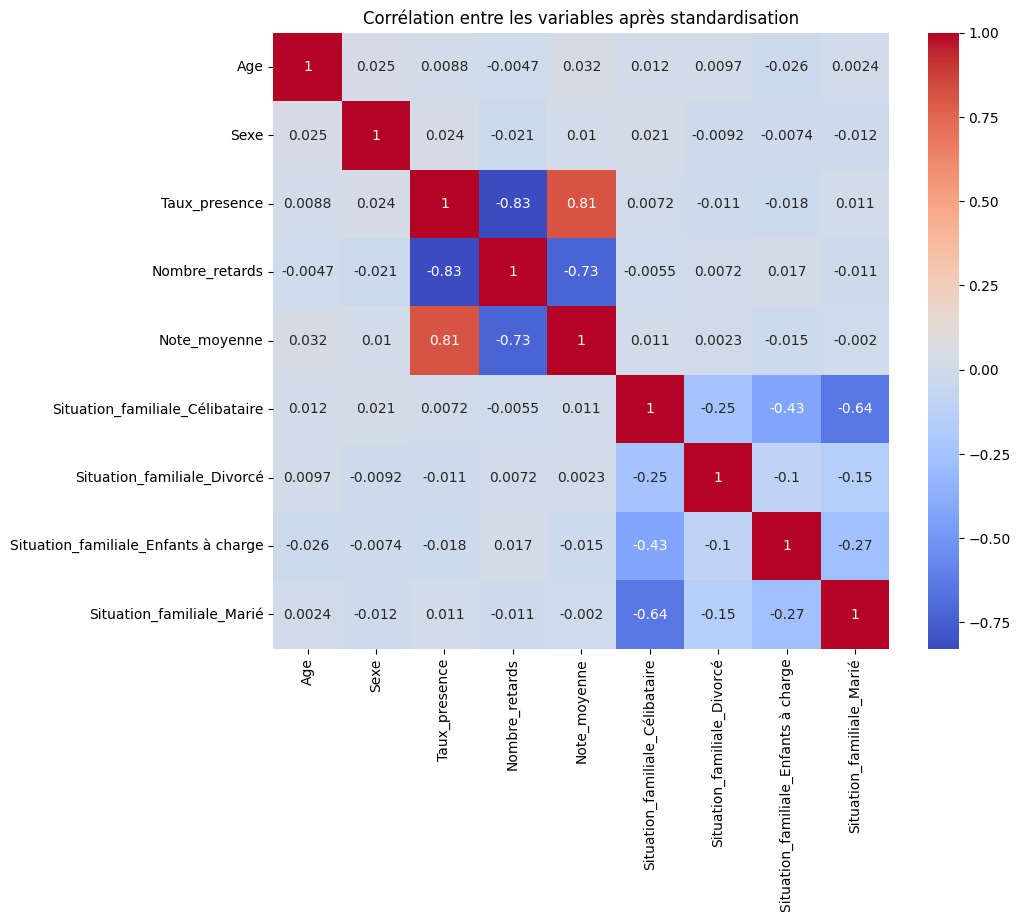

In [18]:
# Calcul de la corrélation (sans la variable cible)
corr_matrix = df_clean.drop(columns="Abandon").corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Corrélation entre les variables après standardisation")
plt.show()

# 3. Split des données

In [19]:
# Séparation des variables explicatives et de la cible
X = df_clean.drop(columns="Abandon")
y = df_clean["Abandon"]

# Séparation avec plus de données dans le test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [20]:
# Vérification des dimensions
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)

X_train : (1400, 9)
X_test  : (600, 9)


In [21]:
# SMOTE (équilibrage de la classe d'entraînement)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [22]:
# Vérification des dimensions
print("X_train_balanced :", X_train.shape)
print("X_test  :", X_test.shape)

X_train_balanced : (2564, 9)
X_test  : (600, 9)


3. a.Revisualisation

In [23]:
# Affichage des premières lignes des données d'entraînement standardisées
print("Aperçu de X_train après nettoyage et standardisation :")
print(X_train.head())

# Vérification des statistiques
print("\nStatistiques descriptives :")
print(X_train.describe())

Aperçu de X_train après nettoyage et standardisation :
        Age      Sexe  Taux_presence  Nombre_retards  Note_moyenne  \
0  0.202206 -1.011061      -0.853480       -0.331971     -0.534302   
1 -0.791436  0.989060       0.247270       -0.331971      0.614083   
2 -0.791436  0.989060      -2.057301        1.346062     -2.089920   
3  1.195848  0.989060       1.670864       -0.891315      2.146405   
4 -0.791436 -1.011061      -0.677446        1.346062     -0.369330   

   Situation_familiale_Célibataire  Situation_familiale_Divorcé  \
0                         0.986097                    -0.244711   
1                        -1.014099                    -0.244711   
2                        -1.014099                    -0.244711   
3                         0.986097                    -0.244711   
4                         0.986097                    -0.244711   

   Situation_familiale_Enfants à charge  Situation_familiale_Marié  
0                              -0.42173             

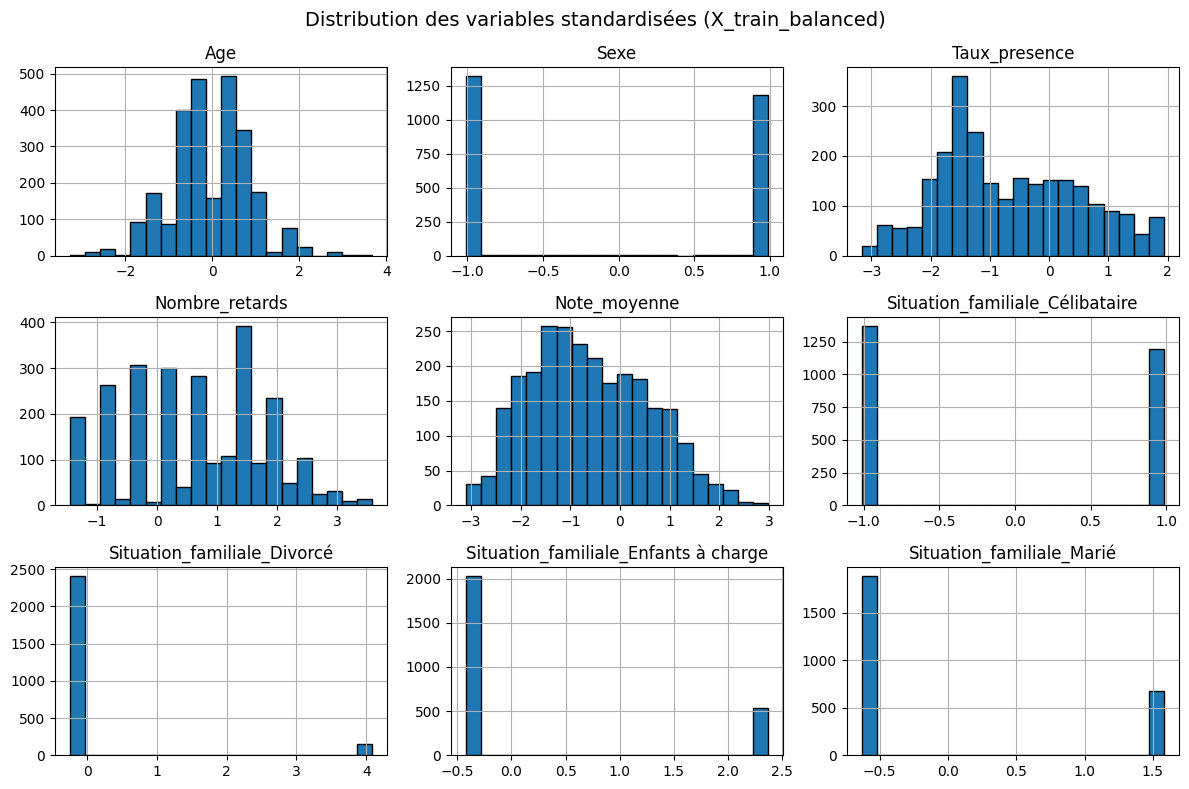

In [24]:
# Histogramme de toutes les colonnes standardisées
X_train.hist(figsize=(12, 8), edgecolor='black', bins=20)
plt.suptitle("Distribution des variables standardisées (X_train_balanced)", fontsize=14)
plt.tight_layout()
plt.show()

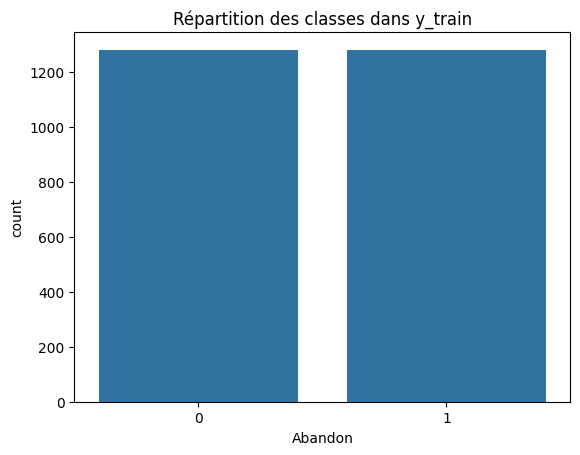

In [25]:
sns.countplot(x=y_train)
plt.title("Répartition des classes dans y_train")
plt.show()

# 4. PCA

In [26]:
# Lancer la PCA sans réduction (nb composantes = nb variables)
pca = PCA()
X_train_pca_all = pca.fit_transform(X_train)

# Stocker la variance expliquée
explained_var = pca.explained_variance_ratio_

# Concevoir un DataFrame pour l’affichage
pca_df = pd.DataFrame({
    'Composante': [f"PC{i+1}" for i in range(len(explained_var))],
    'Variance_expliquée (%)': np.round(explained_var * 100, 2),
    'Variance_cumulative (%)': np.round(np.cumsum(explained_var) * 100, 2)
})

In [27]:
print("📊 Tableau des variances expliquées par composante :")
print(pca_df)

📊 Tableau des variances expliquées par composante :
  Composante  Variance_expliquée (%)  Variance_cumulative (%)
0        PC1                   37.00                    37.00
1        PC2                   17.00                    54.00
2        PC3                   14.10                    68.09
3        PC4                   11.41                    79.51
4        PC5                    9.25                    88.76
5        PC6                    7.56                    96.32
6        PC7                    2.40                    98.72
7        PC8                    1.28                   100.00
8        PC9                    0.00                   100.00


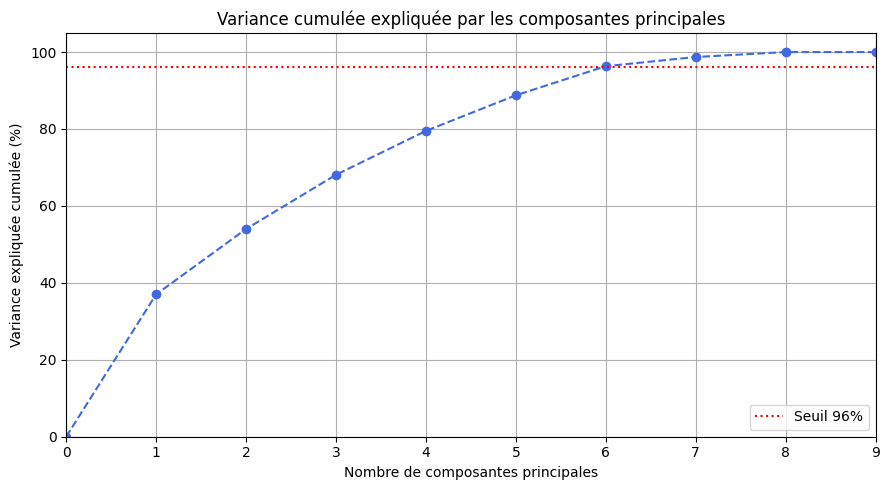

In [38]:
plt.figure(figsize=(9, 5))

# Données
x_vals = list(range(0, len(explained_var) + 1))
y_vals = [0] + list(np.cumsum(explained_var) * 100)

# Tracé
plt.plot(
    x_vals,
    y_vals,
    marker='o',
    linestyle='--',
    color='royalblue'
)

# Personnalisation
plt.title("Variance cumulée expliquée par les composantes principales")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée (%)")
plt.grid(True)
plt.xlim(0, len(explained_var))
plt.xticks(x_vals)
plt.ylim(0, 105)  # Pour laisser de la place au trait rouge
plt.axhline(y=96, color='red', linestyle=':', linewidth=1.5, label='Seuil 96%')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


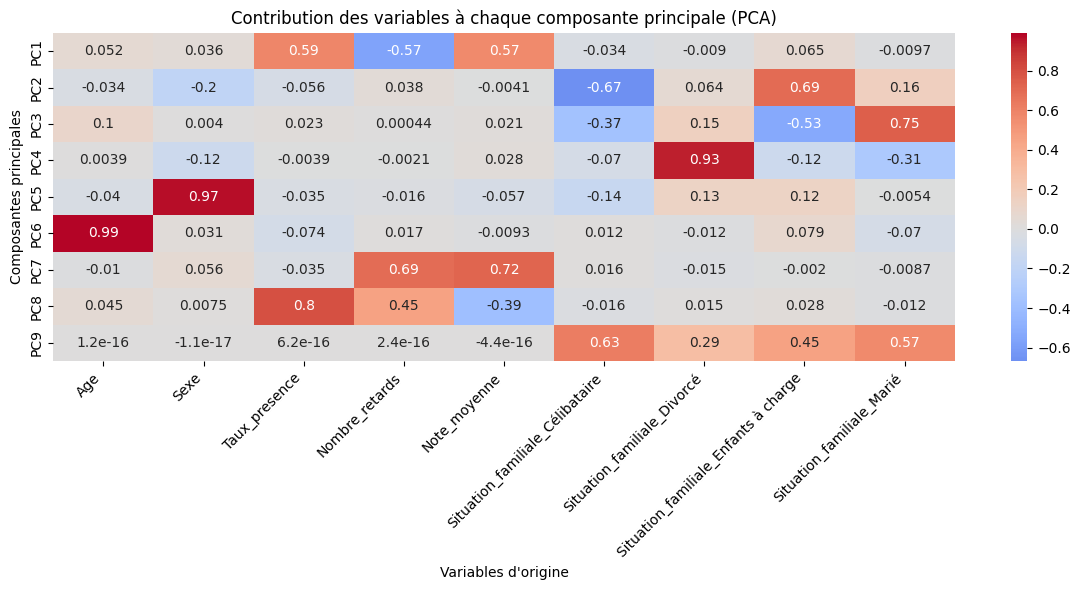

In [29]:
# Vérification : nb de composantes réellement produites par la PCA
num_components = pca.components_.shape[0]  # ici 9 normalement

# Prendre les colonnes correspondantes (au cas où certaines ont été perdues)
selected_columns = list(X_train.columns[:pca.components_.shape[1]])

# Conception du DataFrame des composantes
pca_components_df = pd.DataFrame(
    pca.components_,
    columns=selected_columns,
    index=[f"PC{i+1}" for i in range(num_components)]
)

# Heatmap des contributions
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components_df, annot=True, cmap="coolwarm", center=0)
plt.title("Contribution des variables à chaque composante principale (PCA)")
plt.xlabel("Variables d'origine")
plt.ylabel("Composantes principales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# Compression : on garde uniquement les deux premières composantes
compressed_data = X_train_pca_all[:, :2]  # PC1 et PC2

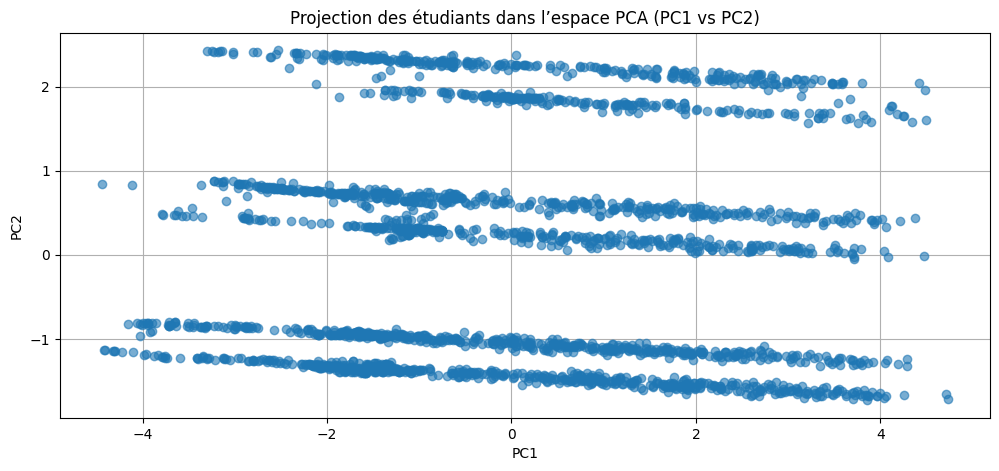

In [31]:
# Affichage de la projection PCA (sans couleur par classe, purement géométrique)
plt.figure(figsize=(12, 5))
plt.plot(compressed_data[:, 0], compressed_data[:, 1], "o", alpha=0.6)
plt.title("Projection des étudiants dans l’espace PCA (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

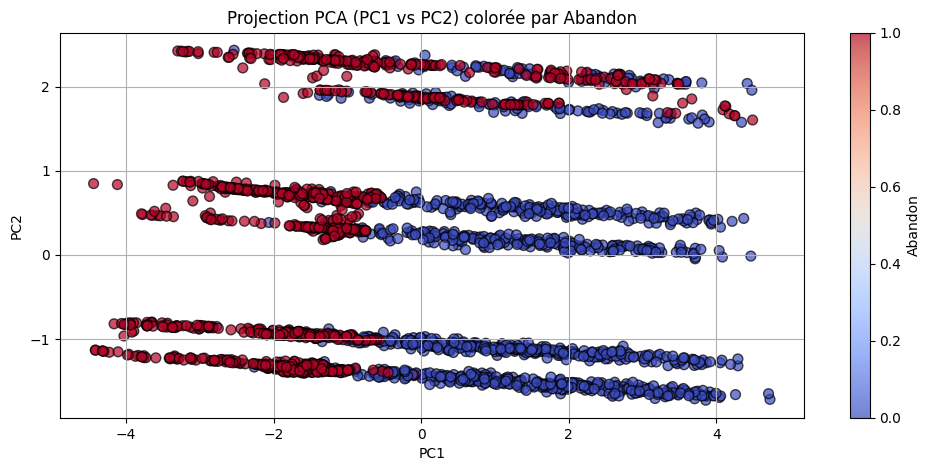

In [32]:
plt.figure(figsize=(12, 5))
plt.scatter(
    compressed_data[:, 0],
    compressed_data[:, 1],
    c=y_train,
    cmap="coolwarm",
    edgecolor='k',
    s=50,
    alpha=0.7
)
plt.title("Projection PCA (PC1 vs PC2) colorée par Abandon")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.colorbar(label="Abandon")
plt.show()

# 5. Elbow méthode

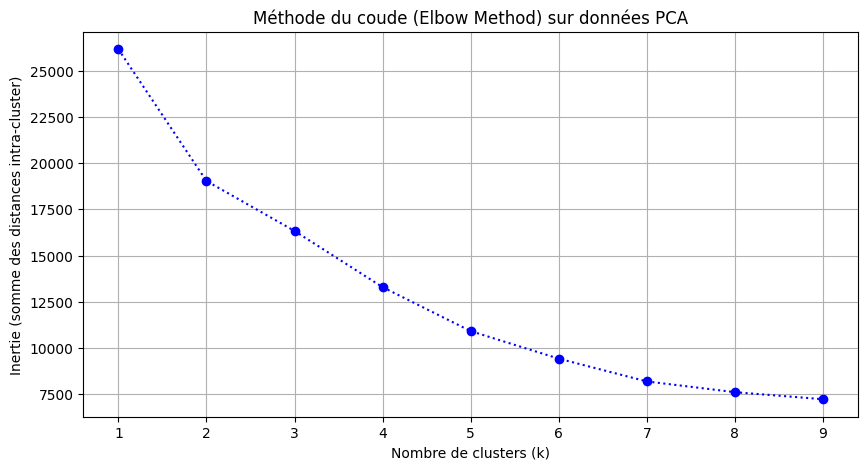

In [39]:
# Fonction de la méthode du coude
def elbow_methode(train_x):
    k_values = []
    variance_per_k_value = []

    for k in range(1, 10):
        k_means_object = KMeans(n_clusters=k, random_state=42)
        k_means_object.fit(train_x)

        k_values.append(k)
        variance_per_k_value.append(k_means_object.inertia_)  # inertie = somme des distances intra-cluster

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, variance_per_k_value, "o:", color='blue')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie (somme des distances intra-cluster)")
    plt.title("Méthode du coude (Elbow Method) sur données PCA")
    plt.grid(True)
    plt.show()

# Appel sur les données projetées PCA
elbow_methode(X_train_pca_all)

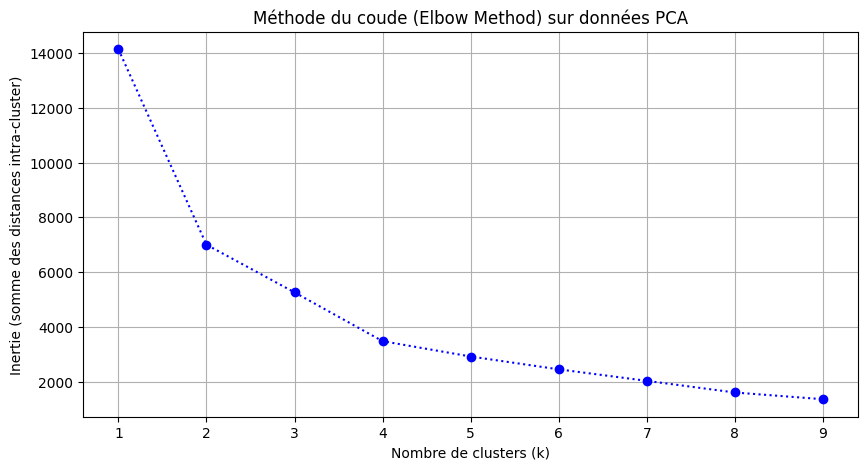

In [40]:
# Elbow methode sur PCA1 et PCA2 uniquement
elbow_methode(compressed_data)

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(compressed_data)
cluster_labels = kmeans.labels_

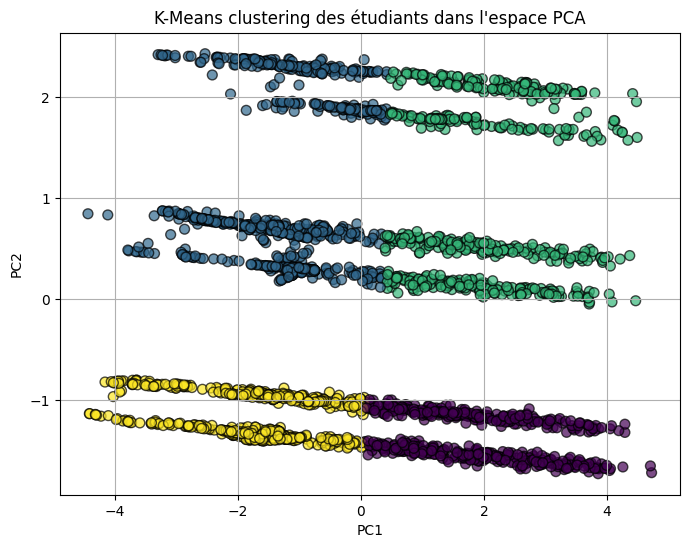

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(
    compressed_data[:, 0],
    compressed_data[:, 1],
    c=cluster_labels,
    cmap="viridis",
    s=50,
    alpha=0.7,
    edgecolor='k'
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means clustering des étudiants dans l'espace PCA")
plt.grid(True)
plt.show()


# 6. Prédiction Knn

In [57]:
pca = PCA(n_components=6)
X_train_pca6 = pca.fit_transform(X_train)
X_test_pca6 = pca.transform(X_test)

In [61]:
# GridSearchCV pour maximiser le RECALL
param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='f1',  # on maximise le f1-score de la classe positive
    n_jobs=-1
)
grid_search.fit(X_train_pca6, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='f1')

In [62]:
# Meilleur modèle
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_pca6)
y_proba = best_knn.predict_proba(X_test_pca6)[:, 1]

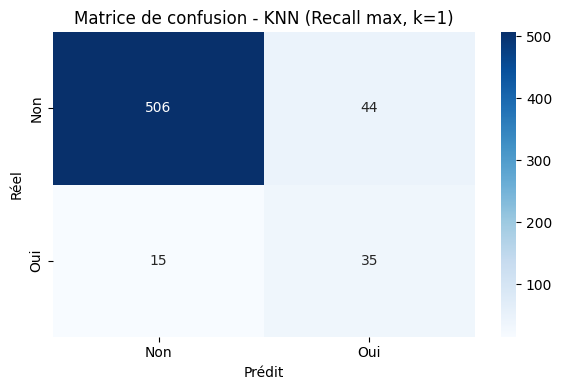

In [63]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title(f"Matrice de confusion - KNN (Recall max, k={grid_search.best_params_['n_neighbors']})")
plt.tight_layout()
plt.show()

In [64]:
# Rapport de classification
print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=["Pas d'abandon", "Abandon"]))

📊 Rapport de classification :
               precision    recall  f1-score   support

Pas d'abandon       0.97      0.92      0.94       550
      Abandon       0.44      0.70      0.54        50

     accuracy                           0.90       600
    macro avg       0.71      0.81      0.74       600
 weighted avg       0.93      0.90      0.91       600



🔷 ROC AUC : 0.8100


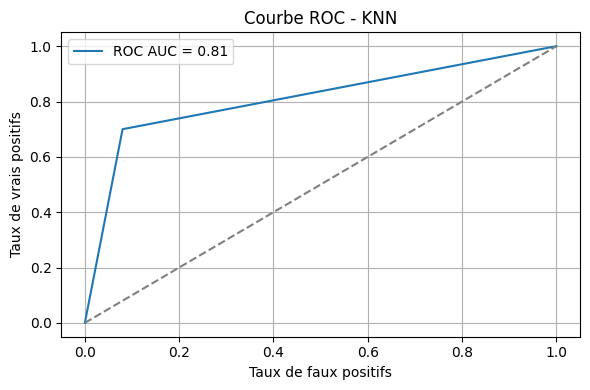

In [65]:
# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"🔷 ROC AUC : {roc_auc:.4f}")

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - KNN")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Facultatif Seuil 0.2

🔹 Matrice de confusion avec seuil 0.2 :
 [[506  44]
 [ 15  35]]

🔹 Rapport de classification (seuil 0.2) :
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       550
           1       0.44      0.70      0.54        50

    accuracy                           0.90       600
   macro avg       0.71      0.81      0.74       600
weighted avg       0.93      0.90      0.91       600



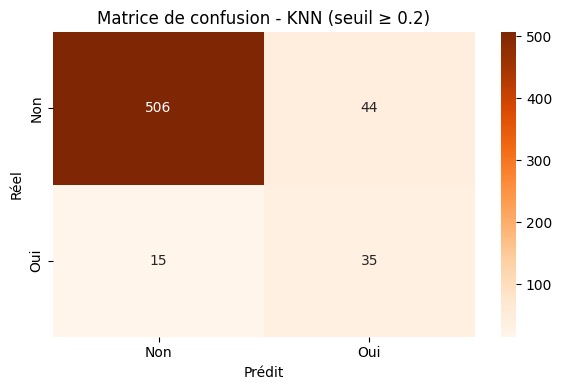

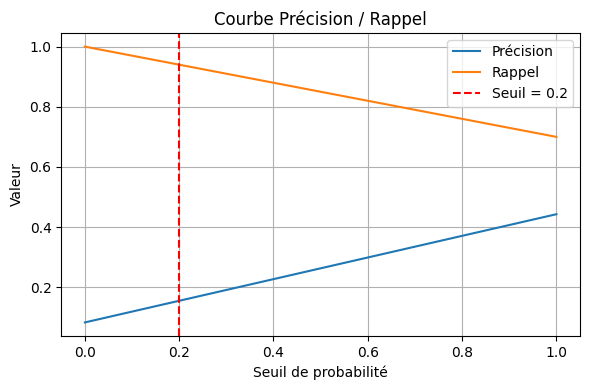

In [66]:
# 1. Calcul de la courbe précision/rappel
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# 2. Application du seuil choisi
seuil_personnalise = 0.2
y_pred_seuil = (y_proba >= seuil_personnalise).astype(int)

# 3. Nouvelle matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_seuil)
print("🔹 Matrice de confusion avec seuil 0.2 :\n", conf_matrix)

# 4. Rapport de classification
print("\n🔹 Rapport de classification (seuil 0.2) :")
print(classification_report(y_test, y_pred_seuil))

# 5. Visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges", xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title(f"Matrice de confusion - KNN (seuil ≥ {seuil_personnalise})")
plt.tight_layout()
plt.show()

# 6. Courbe précision / rappel avec seuil marqué
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], label="Précision")
plt.plot(thresholds, recall[:-1], label="Rappel")
plt.axvline(x=seuil_personnalise, color='red', linestyle='--', label=f"Seuil = {seuil_personnalise}")
plt.xlabel("Seuil de probabilité")
plt.ylabel("Valeur")
plt.title("Courbe Précision / Rappel")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Prédiction Decision Tree

In [68]:
# PCA sur X_train (déjà standardisé)
pca = PCA(n_components=6)
X_train_pca6 = pca.fit_transform(X_train)
X_test_pca6 = pca.transform(X_test)

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],  # on teste aussi un arbre sans limite (None)
    'min_samples_split': [2, 5, 10, 20],       # empêche le surapprentissage
    'min_samples_leaf': [1, 2, 5, 10]          # plus de régularisation sur les feuilles
}

# GridSearchCV avec scoring sur le recall
grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search_dt.fit(X_train_pca6, y_train)

# Meilleur modèle
best_dt = grid_search_dt.best_estimator_

In [69]:
y_pred_dt = best_dt.predict(X_test_pca6)
y_proba_dt = best_dt.predict_proba(X_test_pca6)[:, 1]

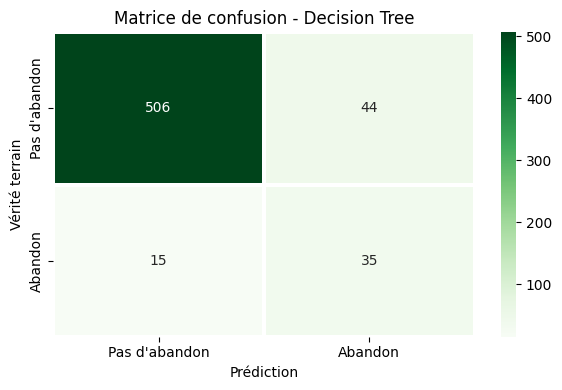

In [70]:
# Affichage esthétique de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens", linewidths=1.5,
            xticklabels=["Pas d'abandon", "Abandon"],
            yticklabels=["Pas d'abandon", "Abandon"])
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion - Decision Tree")
plt.tight_layout()
plt.show()

In [71]:
# Rapport de classification
print("\n🔹 Rapport de classification (prédiction directe) :")
print(classification_report(y_test, y_pred_dt))


🔹 Rapport de classification (prédiction directe) :
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       550
           1       0.48      0.78      0.60        50

    accuracy                           0.91       600
   macro avg       0.73      0.85      0.77       600
weighted avg       0.94      0.91      0.92       600



In [72]:
# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba_dt)
print(f"\n🔷 ROC AUC : {roc_auc:.4f}")
print(f"\n✅ Meilleurs hyperparamètres : {grid_search_dt.best_params_}")


🔷 ROC AUC : 0.8700

✅ Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


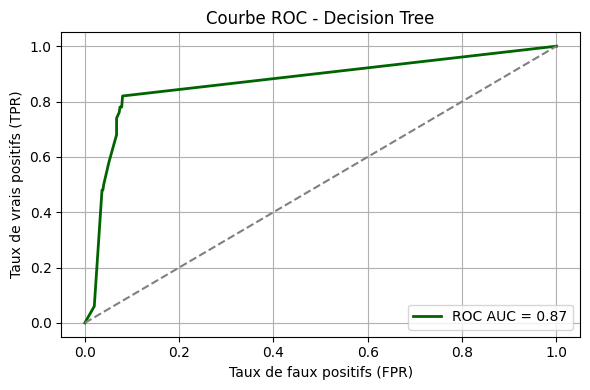

In [73]:
# Calcul des valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)

# Tracé de la courbe ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color="darkgreen", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # diagonale
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Facultatif Seuil

🔹 Matrice de confusion avec seuil 0.2 :
 [[506  44]
 [  9  41]]

🔹 Rapport de classification (seuil 0.2) :
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       550
           1       0.48      0.82      0.61        50

    accuracy                           0.91       600
   macro avg       0.73      0.87      0.78       600
weighted avg       0.94      0.91      0.92       600



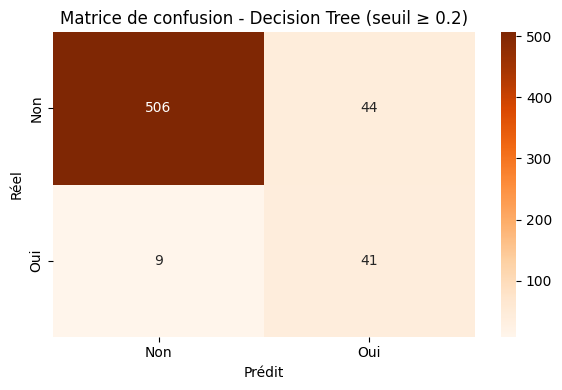

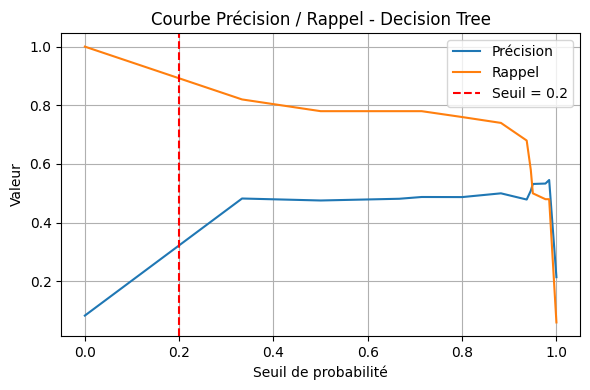

In [74]:
# 1. Courbe précision / rappel
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_proba_dt)

# 2. Application du seuil choisi
seuil_personnalise = 0.2
y_pred_dt_seuil = (y_proba_dt >= seuil_personnalise).astype(int)

# 3. Matrice de confusion
conf_matrix_dt_thresh = confusion_matrix(y_test, y_pred_dt_seuil)
print("🔹 Matrice de confusion avec seuil 0.2 :\n", conf_matrix_dt_thresh)

# 4. Rapport de classification
print("\n🔹 Rapport de classification (seuil 0.2) :")
print(classification_report(y_test, y_pred_dt_seuil))

# 5. Affichage heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt_thresh, annot=True, fmt='d', cmap="Oranges",
            xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title(f"Matrice de confusion - Decision Tree (seuil ≥ {seuil_personnalise})")
plt.tight_layout()
plt.show()

# 6. Courbe précision / rappel
plt.figure(figsize=(6, 4))
plt.plot(thresholds_dt, precision_dt[:-1], label="Précision")
plt.plot(thresholds_dt, recall_dt[:-1], label="Rappel")
plt.axvline(x=seuil_personnalise, color='red', linestyle='--', label=f"Seuil = {seuil_personnalise}")
plt.xlabel("Seuil de probabilité")
plt.ylabel("Valeur")
plt.title("Courbe Précision / Rappel - Decision Tree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 6. Prédiction RandomForestClassifier

In [75]:
# 1. Réduction avec PCA à 6 composantes
pca = PCA(n_components=6)
X_train_pca6 = pca.fit_transform(X_train)
X_test_pca6 = pca.transform(X_test)

# 2. Grille d’hyperparamètres pour la recherche
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# 3. GridSearchCV avec scoring orienté rappel
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search_rf.fit(X_train_pca6, y_train)

# 4. Meilleur modèle et prédiction
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_pca6)
y_proba_rf = best_rf.predict_proba(X_test_pca6)[:, 1]

In [76]:
# 5. Évaluation
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("🔹 Matrice de confusion (prédiction directe) :\n", conf_matrix_rf)

print("\n🔹 Rapport de classification (prédiction directe) :")
print(classification_report(y_test, y_pred_rf))

roc_auc = roc_auc_score(y_test, y_proba_rf)
print(f"\n🔷 ROC AUC : {roc_auc:.4f}")
print(f"\n✅ Meilleurs hyperparamètres : {grid_search_rf.best_params_}")

🔹 Matrice de confusion (prédiction directe) :
 [[510  40]
 [ 12  38]]

🔹 Rapport de classification (prédiction directe) :
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       550
           1       0.49      0.76      0.59        50

    accuracy                           0.91       600
   macro avg       0.73      0.84      0.77       600
weighted avg       0.94      0.91      0.92       600


🔷 ROC AUC : 0.9347

✅ Meilleurs hyperparamètres : {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


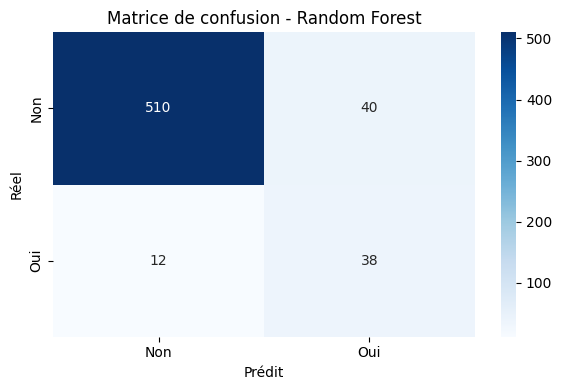

In [77]:
# 6. Affichage heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")
plt.tight_layout()
plt.show()

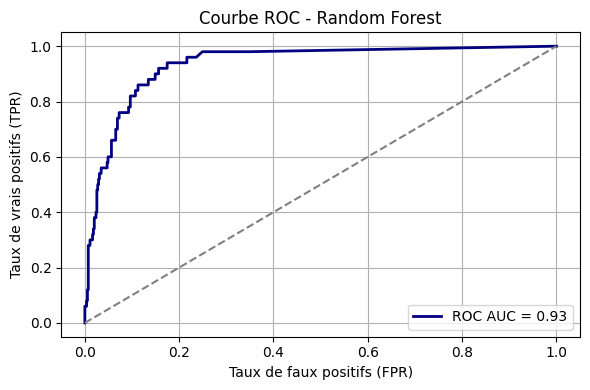

In [78]:
# 1. Courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

# 2. Affichage
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"ROC AUC = {roc_auc:.2f}", color="navy", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # diagonale
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Facultatif Seuil

🔹 Matrice de confusion avec seuil 0.2 :
 [[461  89]
 [  4  46]]

🔹 Rapport de classification (seuil 0.2) :
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       550
           1       0.34      0.92      0.50        50

    accuracy                           0.84       600
   macro avg       0.67      0.88      0.70       600
weighted avg       0.94      0.84      0.87       600



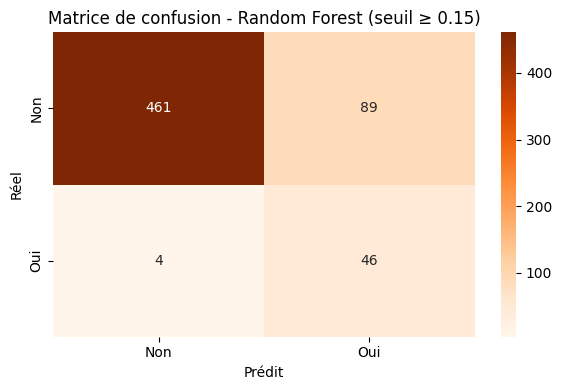

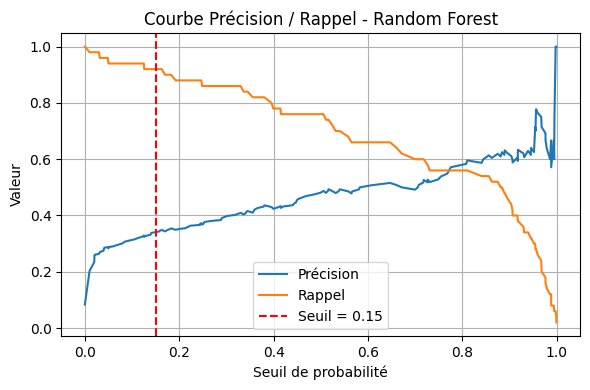

In [79]:
# 1. Courbe précision / rappel
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)

# 2. Application du seuil choisi
seuil_rf = 0.15
y_pred_rf_seuil = (y_proba_rf >= seuil_rf).astype(int)

# 3. Matrice de confusion
conf_matrix_rf_thresh = confusion_matrix(y_test, y_pred_rf_seuil)
print("🔹 Matrice de confusion avec seuil 0.2 :\n", conf_matrix_rf_thresh)

# 4. Rapport de classification
print("\n🔹 Rapport de classification (seuil 0.2) :")
print(classification_report(y_test, y_pred_rf_seuil))

# 5. Heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_thresh, annot=True, fmt='d', cmap="Oranges",
            xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title(f"Matrice de confusion - Random Forest (seuil ≥ {seuil_rf})")
plt.tight_layout()
plt.show()

# 6. Courbe précision / rappel
plt.figure(figsize=(6, 4))
plt.plot(thresholds_rf, precision_rf[:-1], label="Précision")
plt.plot(thresholds_rf, recall_rf[:-1], label="Rappel")
plt.axvline(x=seuil_rf, color='red', linestyle='--', label=f"Seuil = {seuil_rf}")
plt.xlabel("Seuil de probabilité")
plt.ylabel("Valeur")
plt.title("Courbe Précision / Rappel - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Prévisualisation XGBoost

In [48]:
# 1. PCA à 6 composantes
pca = PCA(n_components=6)
X_train_pca6 = pca.fit_transform(X_train)
X_test_pca6 = pca.transform(X_test)

# 2. Grille d’hyperparamètres à tester
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

# 3. Modèle avec GridSearchCV orienté recall
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(X_train_pca6, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1')

In [49]:
# 4. Meilleur modèle & prédiction
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_pca6)
y_proba_xgb = best_xgb.predict_proba(X_test_pca6)[:, 1]

In [50]:
# 5. Évaluation
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("🔹 Matrice de confusion (XGBoost prédiction directe) :\n", conf_matrix_xgb)

print("\n🔹 Rapport de classification (XGBoost prédiction directe) :")
print(classification_report(y_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"\n🔷 ROC AUC : {roc_auc_xgb:.4f}")
print(f"\n✅ Meilleurs hyperparamètres : {grid_search_xgb.best_params_}")

🔹 Matrice de confusion (XGBoost prédiction directe) :
 [[509  41]
 [ 14  36]]

🔹 Rapport de classification (XGBoost prédiction directe) :
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       550
           1       0.47      0.72      0.57        50

    accuracy                           0.91       600
   macro avg       0.72      0.82      0.76       600
weighted avg       0.93      0.91      0.92       600


🔷 ROC AUC : 0.9384

✅ Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


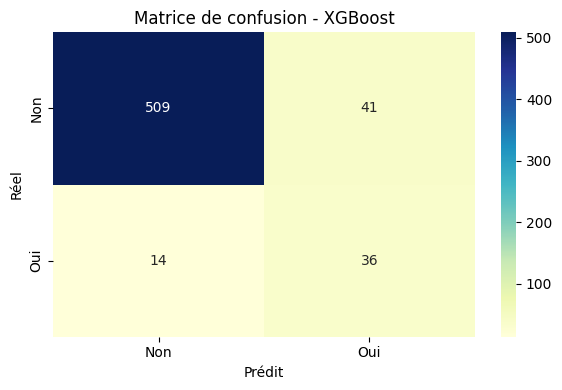

In [51]:
# 6. Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - XGBoost")
plt.tight_layout()
plt.show()

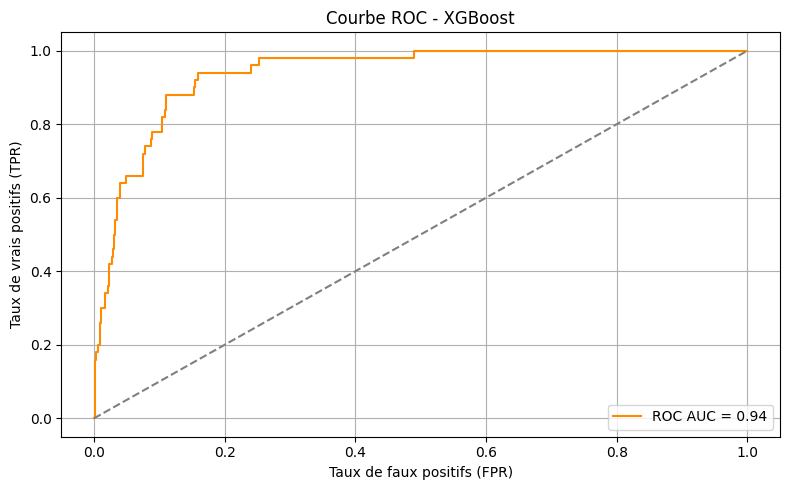

In [52]:
# Courbe ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

plt.figure(figsize=(8, 5))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', label=f"ROC AUC = {roc_auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()